In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


C:\Users\aarda\AppData\Local\Temp\ipykernel_2168\3538350959.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [6]:
pd.set_option("display.max_columns", None)

In [3]:
df = pd.read_csv("cancer_dataset.csv")

In [7]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [20]:
sda = df[["radius_mean","smoothness_mean","texture_se","symmetry_mean","compactness_mean"]]
sda.describe()


,radius_mean,smoothness_mean,texture_se,symmetry_mean,compactness_mean
count,449.000000,449.000000,449.000000,449.000000,449.000000
mean,14.221321,0.096536,1.200766,0.182612,0.105212
std,3.496146,0.013679,0.533322,0.028151,0.054132
min,6.981000,0.062510,0.360200,0.116700,0.019380
25%,11.760000,0.086770,0.828200,0.163000,0.065260
50%,13.460000,0.096460,1.073000,0.180900,0.092280
75%,16.130000,0.105400,1.471000,0.196600,0.131300
max,28.110000,0.144700,4.885000,0.304000,0.345400


In [22]:
data = {}

for col in sda.columns:
    data[col] = {}
    data[col]["Q1"] = np.percentile(sda[col], 25)
    data[col]["Q3"] = np.percentile(sda[col], 75)
    data[col]["IQR"] = data[col]["Q3"] - data[col]["Q1"]

In [27]:
upper_bound = data["radius_mean"]["Q3"] + (data["radius_mean"]["IQR"] * 1.5)
lower_bound = data["radius_mean"]["Q1"] - (data["radius_mean"]["IQR"] * 1.5)


In [34]:
lower_bound

5.205000000000001

In [35]:
upper_bound

22.685

In [32]:
rad = sda.radius_mean
# filter = rad > upper_bound or rad < lower_bound
filtered_rad = rad[(rad > upper_bound) | (rad < lower_bound)]

filtered_rad

82     25.22
122    24.25
164    23.27
180    27.22
202    23.29
212    28.11
236    23.21
339    23.51
352    25.73
Name: radius_mean, dtype: float64

In [36]:
sda.sort_values(by=["radius_mean"],ascending=False)

,radius_mean,smoothness_mean,texture_se,symmetry_mean,compactness_mean
212,28.110,0.11420,1.4760,0.1648,0.15160
180,27.220,0.10940,1.4810,0.1800,0.19140
352,25.730,0.11490,0.8509,0.1956,0.23630
82,25.220,0.10630,1.4740,0.1829,0.26650
122,24.250,0.14470,3.1200,0.2655,0.28670
...,...,...,...,...,...
61,8.598,0.12430,2.0670,0.1828,0.08963
314,8.597,0.10740,2.7770,0.2163,0.05847
151,8.219,0.09405,1.9620,0.2222,0.13050
46,8.196,0.08600,0.9567,0.1769,0.05943


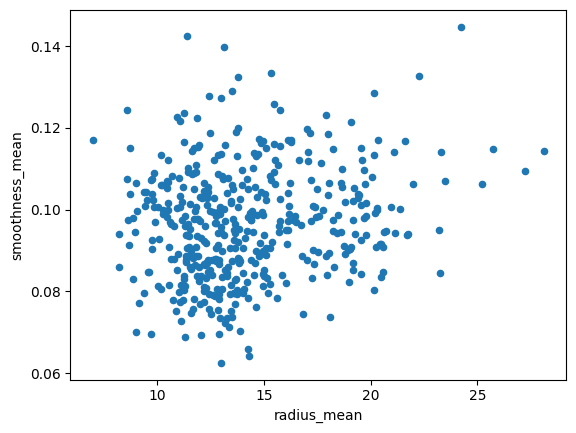

In [37]:
sda.plot.scatter(
    x='radius_mean',
    y='smoothness_mean'
);

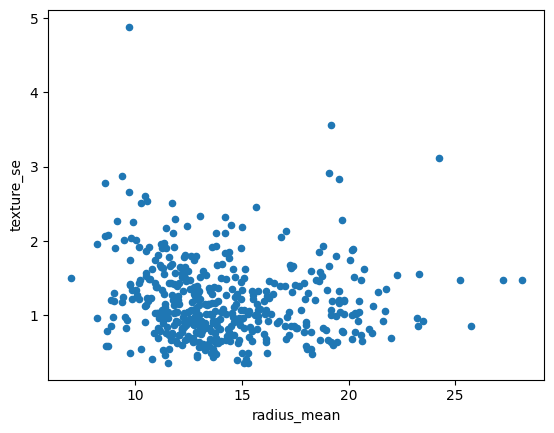

In [38]:
sda.plot.scatter(
    x='radius_mean',
    y='texture_se'
);

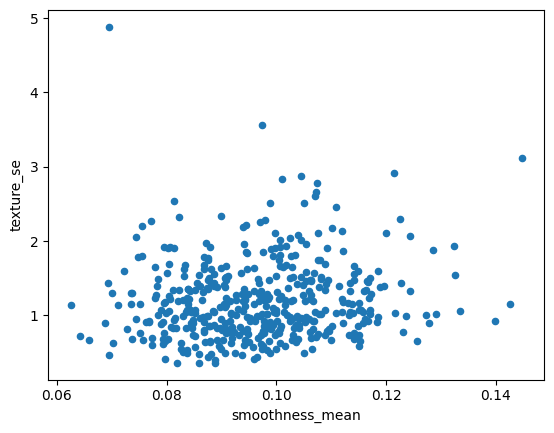

In [40]:
sda.plot.scatter(
    x='smoothness_mean',
    y='texture_se'
);

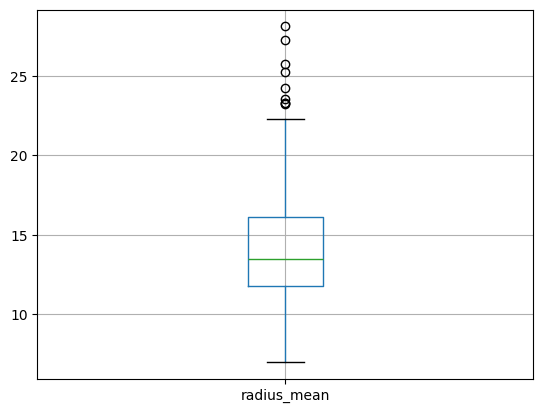

In [42]:
sda.boxplot(column=['radius_mean']);

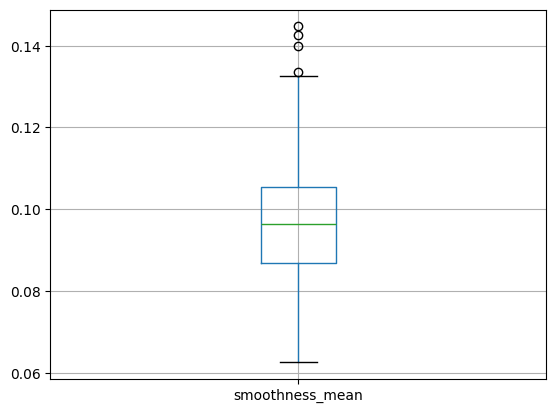

In [43]:
sda.boxplot(column=['smoothness_mean']);

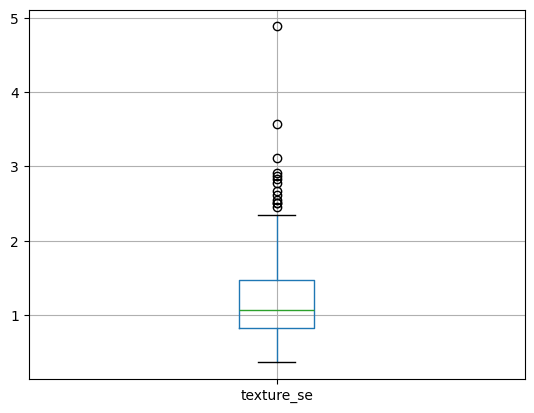

In [44]:
sda.boxplot(column=['texture_se']);